# Logistic Regression

Note: This notebook has some weird behavior, which I think is due to the fact that there is not Bias term. Perhaps the experiments should be repeated and include bias and see if the results are different. It seems now that the model has trouble converging if the weights are not initialized in a certain way. Also the visualizations of the derivatives looked really strange. 

In [175]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
np.random.seed(0)

## Log odds 

Odds also have a simple relation with probability: the odds of an outcome are the ratio of the probability that the outcome occurs to the probability that the outcome does not occur

In [177]:
# Define the probability of success (positive class)
probability_success = 0.7

# Calculate the odds
odds = probability_success / (1 - probability_success)

# Calculate the log odds (logit)
log_odds = np.log(odds)

print(f"Probability of Success: {probability_success}")
print(f"Odds: {odds}")
print(f"Log Odds (Logit): {log_odds}")

Probability of Success: 0.7
Odds: 2.333333333333333
Log Odds (Logit): 0.8472978603872034


## Logistic Function

In [178]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

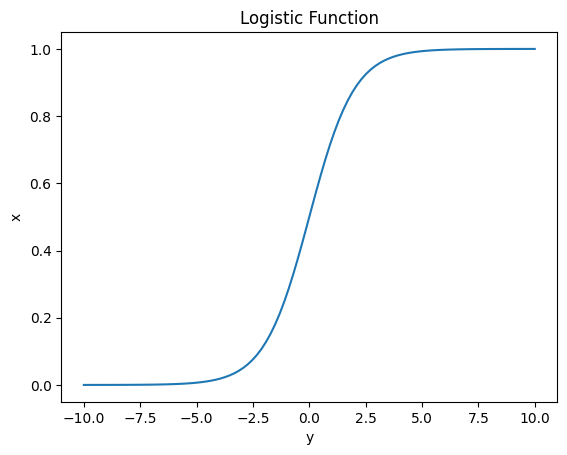

In [179]:
a = np.linspace(-10, 10, 100)

plt.plot(a, logistic_function(a))
plt.xlabel("y")
plt.ylabel("x")
plt.title("Logistic Function")
plt.show()

## Generating data

When we generate data we set the coefficients such that they correspond to some decision boundary:
$$
\(w_0 + w_1 \cdot X_1 + w_2 \cdot X_2 = 0\)
$$
We're actually going to ignore the bias term in this demonstration, giving:
$$
\(w_1 \cdot X_1 + w_2 \cdot X_2 = 0\)
$$
If we want to represent the decision boundary as a slope we can solve for $X_1$ or $X_2$, e.g.:
$$
X_1 = - (w_2 * X_2) / w_1
$$
Because of this property, the weights are scale invariant, this means that it does not matter if we increase the scale by, for example, factor 10, the decision boundary would be the same.

In [180]:
num_samples = 200
num_features = 2

In [181]:
# Generate random feature data
X = 10 * np.random.rand(num_samples, num_features) - 5

In [182]:
# Coefficients for the logistic regression model
coefficients = np.array([[1.0], [1.0]])  # Shape (2, 1)

In [183]:
# Calculate the log-odds (logit)
log_odds = np.dot(X, coefficients).flatten() + 0.5 * np.random.randn(num_samples)

In [184]:
probabilities = logistic_function(log_odds)

# Generate binary labels based on a threshold (e.g., 0.5)
labels = (probabilities > 0.5).astype(int)

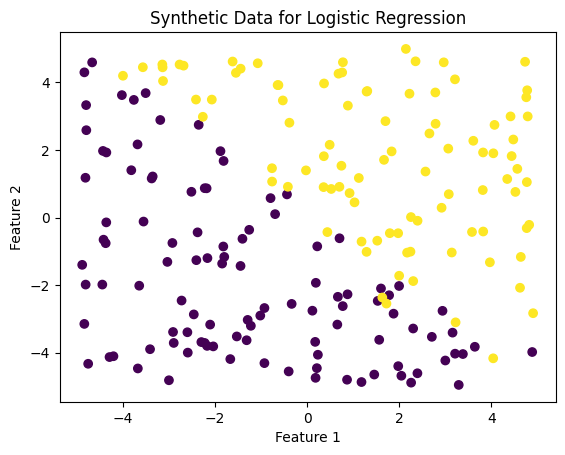

In [185]:
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data for Logistic Regression")
plt.show()

## Investigating the Loss function

Logistic Loss (for a positive class, y = 1):
$$
L(y, y_{\text{pred}}) = -\log(y_{\text{pred}})
$$
Logistic Loss (for a positive class, y = 1):
$$
L(y, y_{\text{pred}}) = -\log(1 - y_{\text{pred}})
$$

Which together can be written as:
$$
L(y, y_{\text{pred}}) = -\left( y \cdot \log(y_{\text{pred}}) + (1 - y) \cdot \log(1 - y_{\text{pred}}) \right)
$$
Where y is the actual label (0 or 1) and y_pred is the predicted probability of the positive class. 

Cost Function (Average Logistic Loss for the entire dataset):
$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( -\left( y^{(i)} \cdot \log(y_{\text{pred}}^{(i)}) + (1 - y^{(i)}) \cdot \log(1 - y_{\text{pred}}^{(i)}) \right) \right)
$$

In [186]:
def objective(y, y_pred):
     # Ensure y_pred is within a small epsilon to avoid numerical issues
    epsilon = 1e-15
    y_pred = np.maximum(epsilon, np.minimum(1 - epsilon, y_pred))
     
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [187]:
def predict(x, weights):
    return logistic_function(np.dot(x, weights))

In [188]:
# Define a range of values for w1 and w2
w1_values = np.linspace(-10, 10, num_samples)
w2_values =  np.linspace(-10, 10, num_samples)

In [189]:
# Calculate the loss (objective function value) for each "m" value
loss_values = np.zeros_like(w1_values)

for i in range(len(w1_values)):
    w1 = w1_values[i]
    # freeze w2 parameter
    w2 = 1
    params = np.array([[w1], [w2]])
    y_pred = predict(X, params).flatten()    
    loss_values[i] = objective(labels, y_pred)

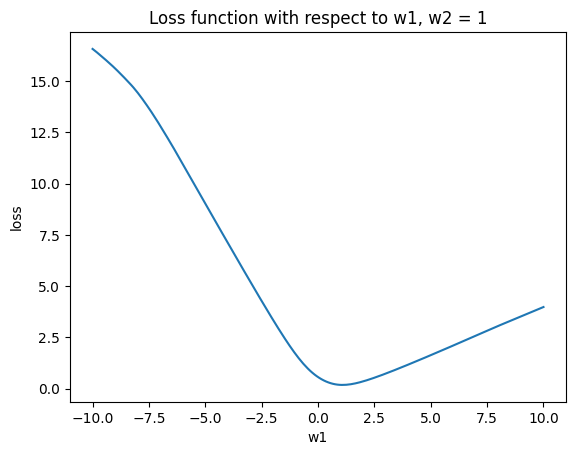

In [190]:
plt.plot(w1_values, loss_values)
plt.xlabel("w1")
plt.ylabel("loss")
plt.title("Loss function with respect to w1, w2 = 1")
plt.show()

In [191]:
# Calculate the loss (objective function value) for each "m" value
loss_values = np.zeros_like(w2_values)

for i in range(len(w2_values)):
    w2 = w2_values[i]
    # freeze b parameter
    w1 = 1
    params = np.array([[w1], [w2]])
    y_pred = predict(X, params).flatten()
    loss_values[i] = objective(labels, y_pred)

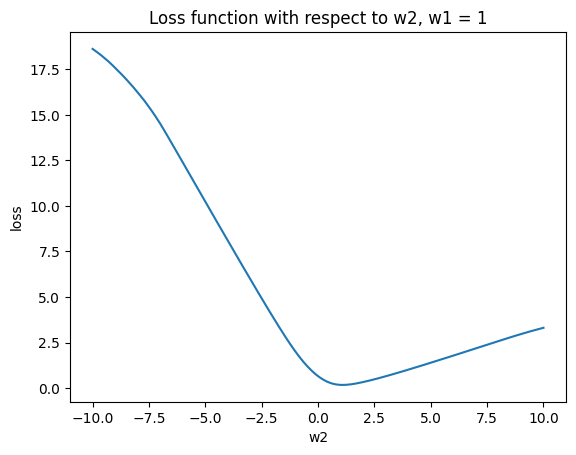

In [192]:
plt.plot(w1_values, loss_values)
plt.xlabel("w2")
plt.ylabel("loss")
plt.title("Loss function with respect to w2, w1 = 1")
plt.show()

In [193]:
# Create a grid of parameter combinations
theta1, theta2 = np.meshgrid(w1_values, w2_values)

# Calculate the loss for each parameter combination (assuming data and labels are available)
loss = np.zeros_like(theta1)
for i in range(len(w1_values)):
    for j in range(len(w2_values)):
        # Calculate loss using your logistic loss function
        w1 = theta1[i, j]
        w2 = theta2[i, j]
        params = np.array([[w1],[w2]])
        y_pred = predict(X, params).flatten()
        loss[i, j] = objective(labels, y_pred)

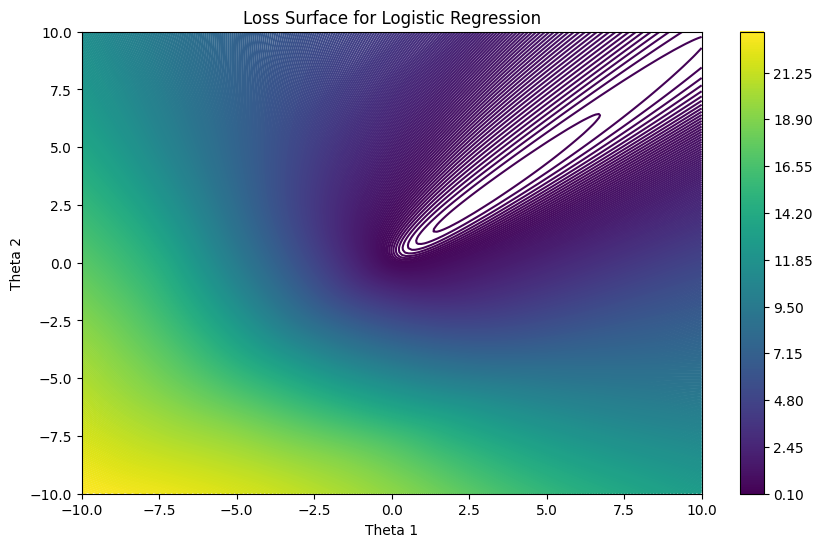

In [194]:
# Create a contour plot of the loss surface
plt.figure(figsize=(10, 6))
contours = plt.contour(theta1, theta2, loss, levels=500, cmap='viridis')
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.colorbar(contours)
plt.title('Loss Surface for Logistic Regression')
plt.show()

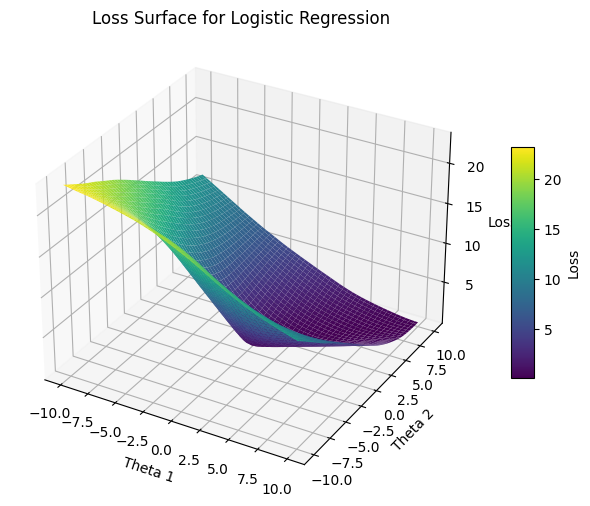

In [195]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(theta1, theta2, loss, cmap='viridis')

# Add labels and title
ax.set_xlabel('Theta 1')
ax.set_ylabel('Theta 2')
ax.set_zlabel('Loss')
ax.set_title('Loss Surface for Logistic Regression')

# Add a color bar which maps values to colors
color_bar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
color_bar.set_label('Loss')

# Show the plot
plt.show()

In [196]:
# Find the indices of the minimum loss value in the matrix
min_indices = np.unravel_index(np.argmin(loss), loss.shape)

# Get the corresponding values of "m" and "b"
optimal_w1 = w1_values[min_indices[1]]
optimal_w2 = w2_values[min_indices[0]]

# Get the minimum loss value
min_loss = loss[min_indices]

print(f"Optimal w1: {optimal_w1}")
print(f"Optimal w2: {optimal_w2}")
print(f"Minimum Loss Value: {min_loss}")

Optimal w1: 3.0653266331658298
Optimal w2: 2.9648241206030157
Minimum Loss Value: 0.11934816197214865


We can see that w1 and w2 have a relationship that is similar to the coefficients used when generating the data, e.g. w1=w2=1

## Optimization

To build an optimizer we need to use the derivative of the loss function with respect to w1 and w2.

The derivative of the objective function with respect to $w_1$

$$
\frac{\partial L}{\partial w_1} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot x_{i2}
$$

And to $w_2$:
$$
\frac{\partial L}{\partial w_2} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot x_{i1}
$$

In [197]:
def gradient(y, y_pred, x):
    y = y[:, np.newaxis]
    error = y_pred - y
    return np.dot(error.T, X)

In [198]:
learning_rate = 0.005

n_iterations = 1000

w1_opt = 0.5
w2_opt = -0.5
w_opt = np.array([[w1_opt], [w2_opt]])

losses = []
for i in range(n_iterations):
    preds = predict(x=X, weights=w_opt)
    
    # print(preds.shape)
    
    grad = gradient(y=labels, y_pred=preds, x=X)
    
    w_opt -= learning_rate * w_opt
    
    loss = objective(y=labels, y_pred=preds)
    
    # print(loss)
    
    losses.append(loss)

print(f"Optimal weights: {w_opt}")
print(f"Minimum Loss Value: {losses[-1]}")


Optimal weights: [[ 0.00332698]
 [-0.00332698]]
Minimum Loss Value: 0.6931921303626907


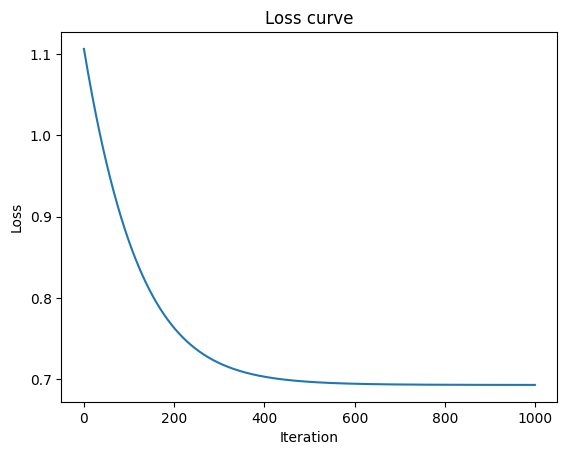

In [199]:
# plot loss curve
iterations = np.arange(n_iterations)
plt.plot(iterations, losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

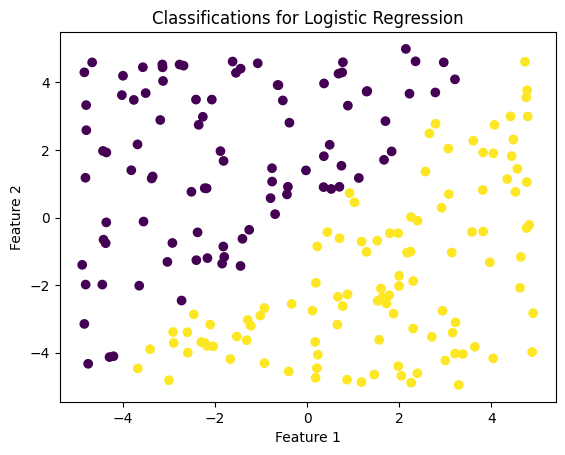

In [200]:
predictions = predict(x=X, weights=w_opt)
rounded_predictions = (predictions > 0.5).astype(int)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=rounded_predictions)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classifications for Logistic Regression")
plt.show()

In [201]:
# Compare the two arrays element-wise
correctly_classified = (labels == rounded_predictions.flatten())

# Count the number of True values (correct classifications)
num_correct = np.sum(correctly_classified)

# Calculate the accuracy as a percentage
accuracy = (num_correct / len(labels)) * 100

print("Number of correctly classified examples:", num_correct)
print("Accuracy:", accuracy, "%")

Number of correctly classified examples: 97
Accuracy: 48.5 %
